# BHARAT INTERN

# DATA SCIENCE INTERN

## Author : Mrunali Ramchandra Powar

# TASK 1 : STOCK PREDICTION

## TO PREDICT THE STOCK PRICE OF A COMPANY USING LSTM.

The dataset is available at Kaggle : https://www.kaggle.com/datasets/thevirusx3/google-stock-market-data

In [16]:
## Importing Libaries to be used
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Importing Data To Be Used

In [17]:
data=pd.read_csv("D://All Datas//csv files//GOOG.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100
...,...,...,...,...,...,...,...
3804,2019-09-30,1220.969971,1226.000000,1212.300049,1219.000000,1219.000000,1404100
3805,2019-10-01,1219.000000,1231.229980,1203.579956,1205.099976,1205.099976,1273500
3806,2019-10-02,1196.979980,1196.979980,1171.290039,1176.630005,1176.630005,1615100
3807,2019-10-03,1180.000000,1189.060059,1162.430054,1187.829956,1187.829956,1621200


In [18]:
data.shape

(3809, 7)

In [19]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [20]:
df=data[['Date','Open','Close']]
data['Date']=pd.to_datetime(df['Date'].apply(lambda x:x.split()[0]))
df.set_index('Date',drop=True,inplace=True)
df.head(10)

,Open,Close
Date,,
2004-08-19,49.813286,49.982655
2004-08-20,50.316402,53.952770
2004-08-23,55.168217,54.495735
2004-08-24,55.412300,52.239193
2004-08-25,52.284027,52.802086
2004-08-26,52.279045,53.753517
2004-08-27,53.848164,52.876804
2004-08-30,52.443428,50.814533
2004-08-31,50.958992,50.993862


# Data Visualization

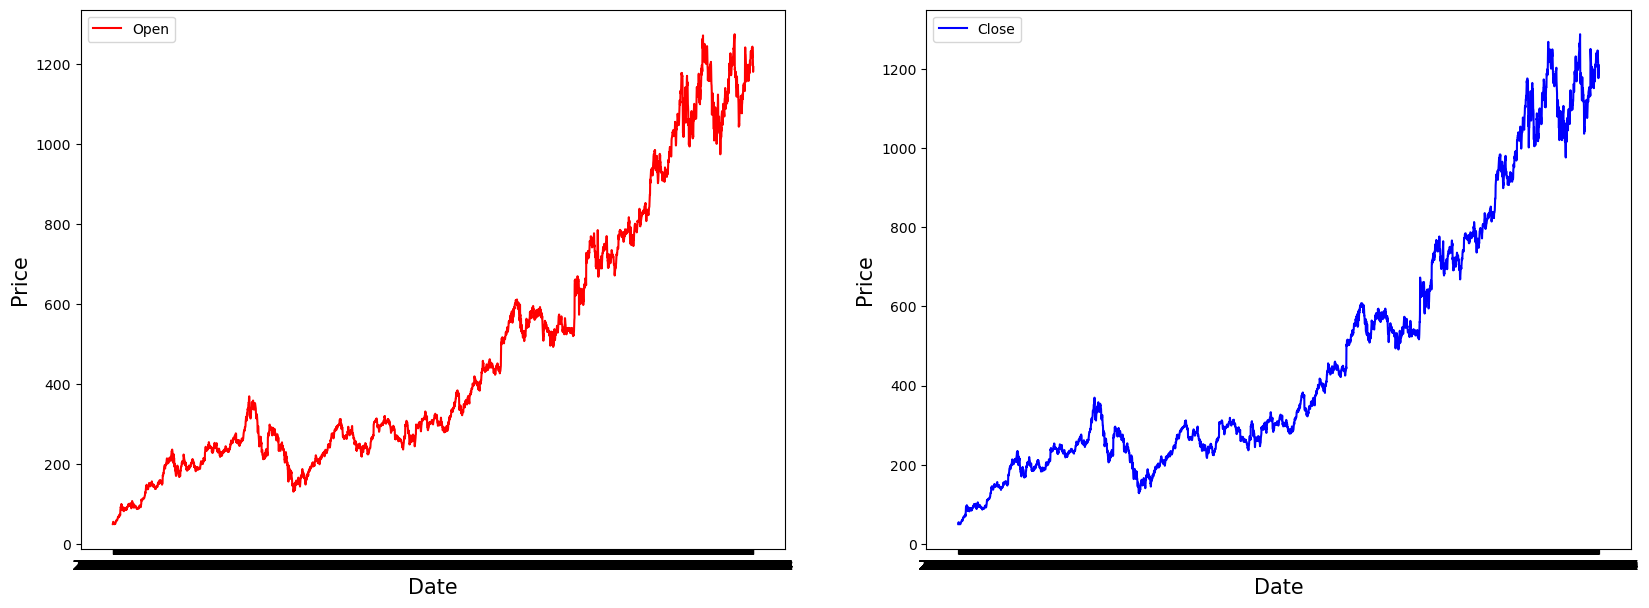

In [21]:
## Ploting open and closing price on date index
fig,ax=plt.subplots(1,2,figsize=(20,7))
ax[0].plot(df['Open'],label='Open',color='red')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(df['Close'],label='Close',color='blue')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()


# Data Preprocessing

In [24]:
## Data Normalization
mms=MinMaxScaler()
df[df.columns]=mms.fit_transform(df)
df.head(10)

C:\Users\mruna\AppData\Local\Temp\ipykernel_22796\1118026247.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df.columns]=mms.fit_transform(df)


,Open,Close
Date,,
2004-08-19,0.000329,0.000133
2004-08-20,0.000740,0.003340
2004-08-23,0.004702,0.003779
2004-08-24,0.004902,0.001956
2004-08-25,0.002347,0.002411
2004-08-26,0.002343,0.003179
2004-08-27,0.003624,0.002471
2004-08-30,0.002477,0.000805
2004-08-31,0.001265,0.000950


# Data Splitting 

In [25]:
training_size=round(len(df)*0.75)
training_size

2857

In [26]:
train_data=df[:training_size]
test_data=df[training_size:]

train_data.shape, test_data.shape

((2857, 2), (952, 2))

In [29]:
def creats_seq(dataset):
    sequences = []
    labels=[]
    
    start_idx=0
    
    for stop_idx in range(50,len(dataset)):
        sequences.append(dataset.iloc[start_idx:stop_idx])
        labels.append(dataset.iloc[stop_idx])
        start_idx += 1
    return (np.array(sequences),np.array(labels))    

In [30]:
train_seq, train_label = creats_seq(train_data)
test_seq, test_label = creats_seq(test_data)
train_seq.shape, train_label.shape, test_seq.shape,test_label.shape

((2807, 50, 2), (2807, 2), (902, 50, 2), (902, 2))

# Creating LSTM Model 

In [47]:
model=Sequential()
model.add(LSTM(units=50))

In [52]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [53]:
# imported Sequential from keras.models 
model = Sequential()
# importing Dense, Dropout, LSTM, Bidirectional from keras.layers 
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1)) 
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 50, 50)            10600     
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 lstm_9 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 2)                 102       
                                                                 
Total params: 30902 (120.71 KB)
Trainable params: 30902 (120.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Fitting The Model

In [54]:
# fitting the model by iterating the dataset over 100 times(100 epochs)
model.fit(train_seq, train_label, epochs=100,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/100
88/88 [==============================] - 10s 56ms/step - loss: 0.0036 - mean_absolute_error: 0.0307 - val_loss: 6.9424e-04 - val_mean_absolute_error: 0.0202
Epoch 2/100
88/88 [==============================] - 4s 40ms/step - loss: 1.8106e-04 - mean_absolute_error: 0.0099 - val_loss: 7.4228e-04 - val_mean_absolute_error: 0.0208
Epoch 3/100
88/88 [==============================] - 4s 40ms/step - loss: 1.7125e-04 - mean_absolute_error: 0.0096 - val_loss: 0.0013 - val_mean_absolute_error: 0.0273
Epoch 4/100
88/88 [==============================] - 4s 40ms/step - loss: 1.7565e-04 - mean_absolute_error: 0.0097 - val_loss: 7.6828e-04 - val_mean_absolute_error: 0.0211
Epoch 5/100
88/88 [==============================] - 4s 40ms/step - loss: 1.5963e-04 - mean_absolute_error: 0.0092 - val_loss: 7.7996e-04 - val_mean_absolute_error: 0.0212
Epoch 6/100
88/88 [==============================] - 4s 40ms/step - loss: 1.5888e-04 - mean_absolute_error: 0.0092 - val_loss: 0.0012 - val_mean_ab

88/88 [==============================] - 4s 43ms/step - loss: 3.3379e-05 - mean_absolute_error: 0.0039 - val_loss: 1.5094e-04 - val_mean_absolute_error: 0.0086
Epoch 96/100
88/88 [==============================] - 4s 43ms/step - loss: 2.8316e-05 - mean_absolute_error: 0.0036 - val_loss: 1.6885e-04 - val_mean_absolute_error: 0.0093
Epoch 97/100
88/88 [==============================] - 4s 43ms/step - loss: 3.0250e-05 - mean_absolute_error: 0.0037 - val_loss: 3.9870e-04 - val_mean_absolute_error: 0.0156
Epoch 98/100
88/88 [==============================] - 4s 43ms/step - loss: 3.1697e-05 - mean_absolute_error: 0.0039 - val_loss: 1.9305e-04 - val_mean_absolute_error: 0.0100
Epoch 99/100
88/88 [==============================] - 4s 43ms/step - loss: 2.8805e-05 - mean_absolute_error: 0.0036 - val_loss: 3.2800e-04 - val_mean_absolute_error: 0.0152
Epoch 100/100
88/88 [==============================] - 4s 42ms/step - loss: 3.0284e-05 - mean_absolute_error: 0.0037 - val_loss: 3.1815e-04 - val_me

In [55]:
# predicting the values after running the model
test_predicted = model.predict(test_seq)
test_predicted[:5]

29/29 [==============================] - 2s 13ms/step


array([[0.5278074 , 0.51768064],
       [0.5280423 , 0.51830363],
       [0.5377743 , 0.52841085],
       [0.5412728 , 0.531828  ],
       [0.5531848 , 0.5437729 ]], dtype=float32)

In [57]:
# Inversing normalization/scaling on predicted data 
test_inverse_predicted = mms.inverse_transform(test_predicted)
test_inverse_predicted[:5]

array([[0.5278074 , 0.51768064],
       [0.5280423 , 0.51830363],
       [0.5377743 , 0.52841085],
       [0.5412728 , 0.531828  ],
       [0.5531848 , 0.5437729 ]], dtype=float32)

# VISUALIZING ACTUAL VS PREDICTED DATA

In [60]:
# Merging actual and predicted data for better visualization
df_merge = pd.concat([df.iloc[-902:].copy(),
                          pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],
                                       index=df.iloc[-902:].index)], axis=1)

In [65]:
# Inversing normalization/scaling 
df_merge[['Open','Close']] = mms.inverse_transform(df_merge[['Open','Close']])
df_merge.head(10)

,Open,Close,open_predicted,close_predicted
Date,,,,
2016-03-08,0.521954,0.520417,0.527807,0.517681
2016-03-09,0.530022,0.529522,0.528042,0.518304
2016-03-10,0.537903,0.535646,0.537774,0.528411
2016-03-11,0.547604,0.546956,0.541273,0.531828
2016-03-14,0.553165,0.549921,0.553185,0.543773
2016-03-15,0.553255,0.548176,0.553846,0.544044
2016-03-16,0.552805,0.554446,0.553018,0.542976
2016-03-17,0.561037,0.555811,0.559755,0.549787
2016-03-18,0.565455,0.555666,0.560798,0.550684


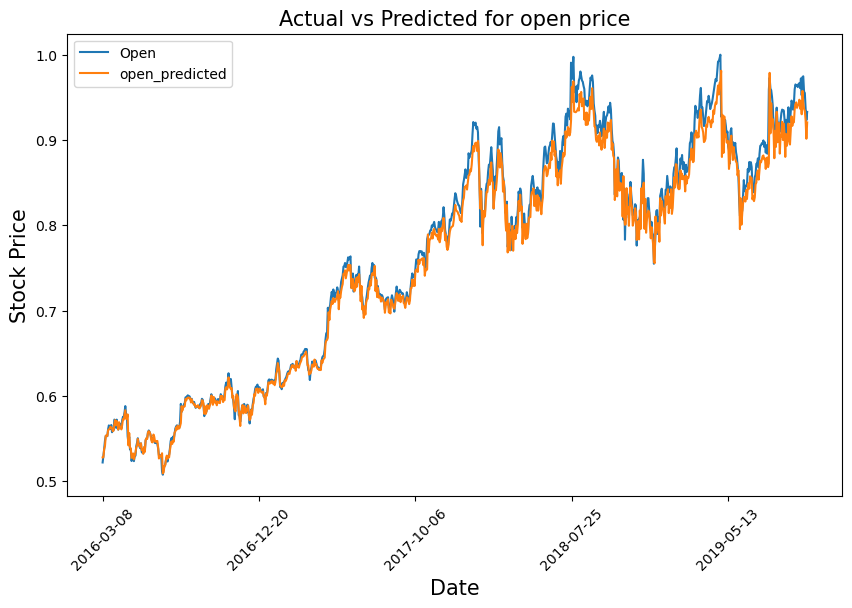

In [67]:
# plotting the actual open and predicted open prices on date index
df_merge[['Open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

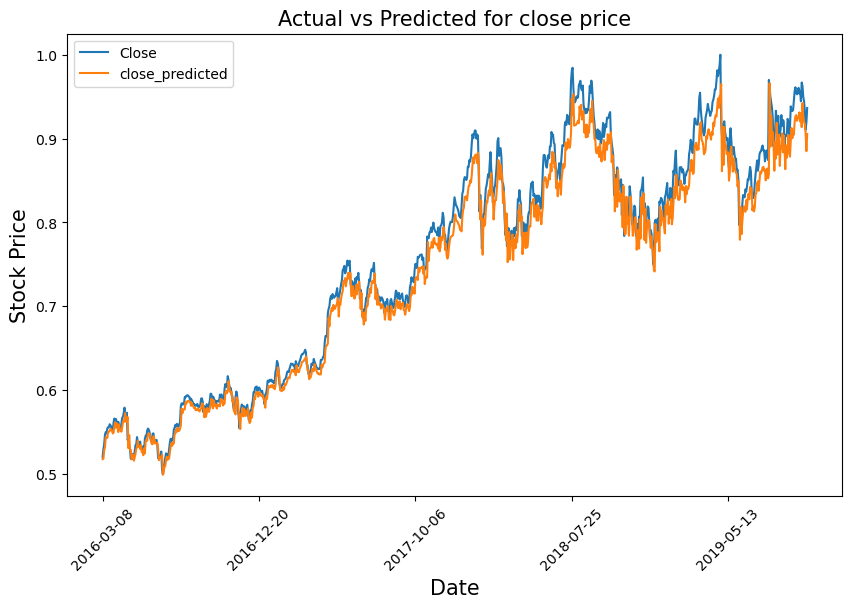

In [68]:
# plotting the actual close and predicted close prices on date index 
df_merge[['Close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()

# Prediction

In [79]:
# Creating a dataframe and adding 10 days to existing index 

df_merge = df_merge.append(pd.DataFrame(columns=df_merge.columns,
                                        index=pd.date_range(start=df_merge.index[-1], periods=11, freq='D', closed='right')))
df_merge['2016-03-08':'2016-03-21']

C:\Users\mruna\AppData\Local\Temp\ipykernel_22796\523487162.py:4: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  index=pd.date_range(start=df_merge.index[-1], periods=11, freq='D', closed='right')))
C:\Users\mruna\AppData\Local\Temp\ipykernel_22796\523487162.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_merge = df_merge.append(pd.DataFrame(columns=df_merge.columns,


,Open,Close,open_predicted,close_predicted
2016-03-08,0.521954,0.520417,0.527807,0.517681
2016-03-09,0.530022,0.529522,0.528042,0.518304
2016-03-10,0.537903,0.535646,0.537774,0.528411
2016-03-11,0.547604,0.546956,0.541273,0.531828
2016-03-14,0.553165,0.549921,0.553185,0.543773
2016-03-15,0.553255,0.548176,0.553846,0.544044
2016-03-16,0.552805,0.554446,0.553018,0.542976
2016-03-17,0.561037,0.555811,0.559755,0.549787
2016-03-18,0.565455,0.555666,0.560798,0.550684
2016-03-21,0.561078,0.559293,0.561169,0.550964


In [80]:
# creating a DataFrame and filling values of open and close column
upcoming_prediction = pd.DataFrame(columns=['open','close'],index=df_merge.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

In [81]:
curr_seq = test_seq[-1:]

for i in range(-10,0):
  up_pred = model.predict(curr_seq)
  upcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(test_seq[-1:].shape)

1/1 [==============================] - 0s 15ms/step
